<a href="https://colab.research.google.com/github/dondreojordan/DS-Unit-1-Build/blob/master/module4-clustering/LS_DS_134_Clustering_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

# 1) Use the "Breast Cancer Wisconsin (Diagnostic) Data Set" from Kaggle to try and cluster types of cancer cells. 

Here's the original dataset for your reference:

<https://www.kaggle.com/uciml/breast-cancer-wisconsin-data>

#NEED TO KNOW THOROUGHLY.NEED TO KNOW THOROUGHLY.NEED TO KNOW THOROUGHLY

Memorize This!

Supervised: Labelled outputs

Classification: Discrete output cagetories
Regression: Continuous output values
Unsupervised: Outputs are not labelled

Reinforcement: Rewards/punishments for "behaviors"

#NEED TO KNOW THOROUGHLY. NEED TO KNOW THOROUGHLY. NEED TO KNOW THOROUGHLY

## This is a supervised learning dataset

(Because it has **labels** - The "diagnosis" column.)

In [53]:
#Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # You don't necessarily have to use this
from sklearn.cluster import KMeans # You don't necessarily have to use this
from sklearn.preprocessing import StandardScaler # You don't necessarily have to use this
%config InlineBackend.figure_format='retina'

#Load in the data

df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")
print(df.shape)
df.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [54]:
check_values = df['diagnosis']
check_values

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

## Now it's an unsupervised learning dataset

(Because we've removed the diagnosis label) - Use this version.

In [55]:
df = df.drop(['diagnosis', 'id', "Unnamed: 32"], axis=1)
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [56]:
pca = df

## Let's do it!

- You might want to do some data exploration to see if you can find specific columns that will help you find distinct clusters of cells
- You might want to use the elbow method to decide on the number of clusters to use.


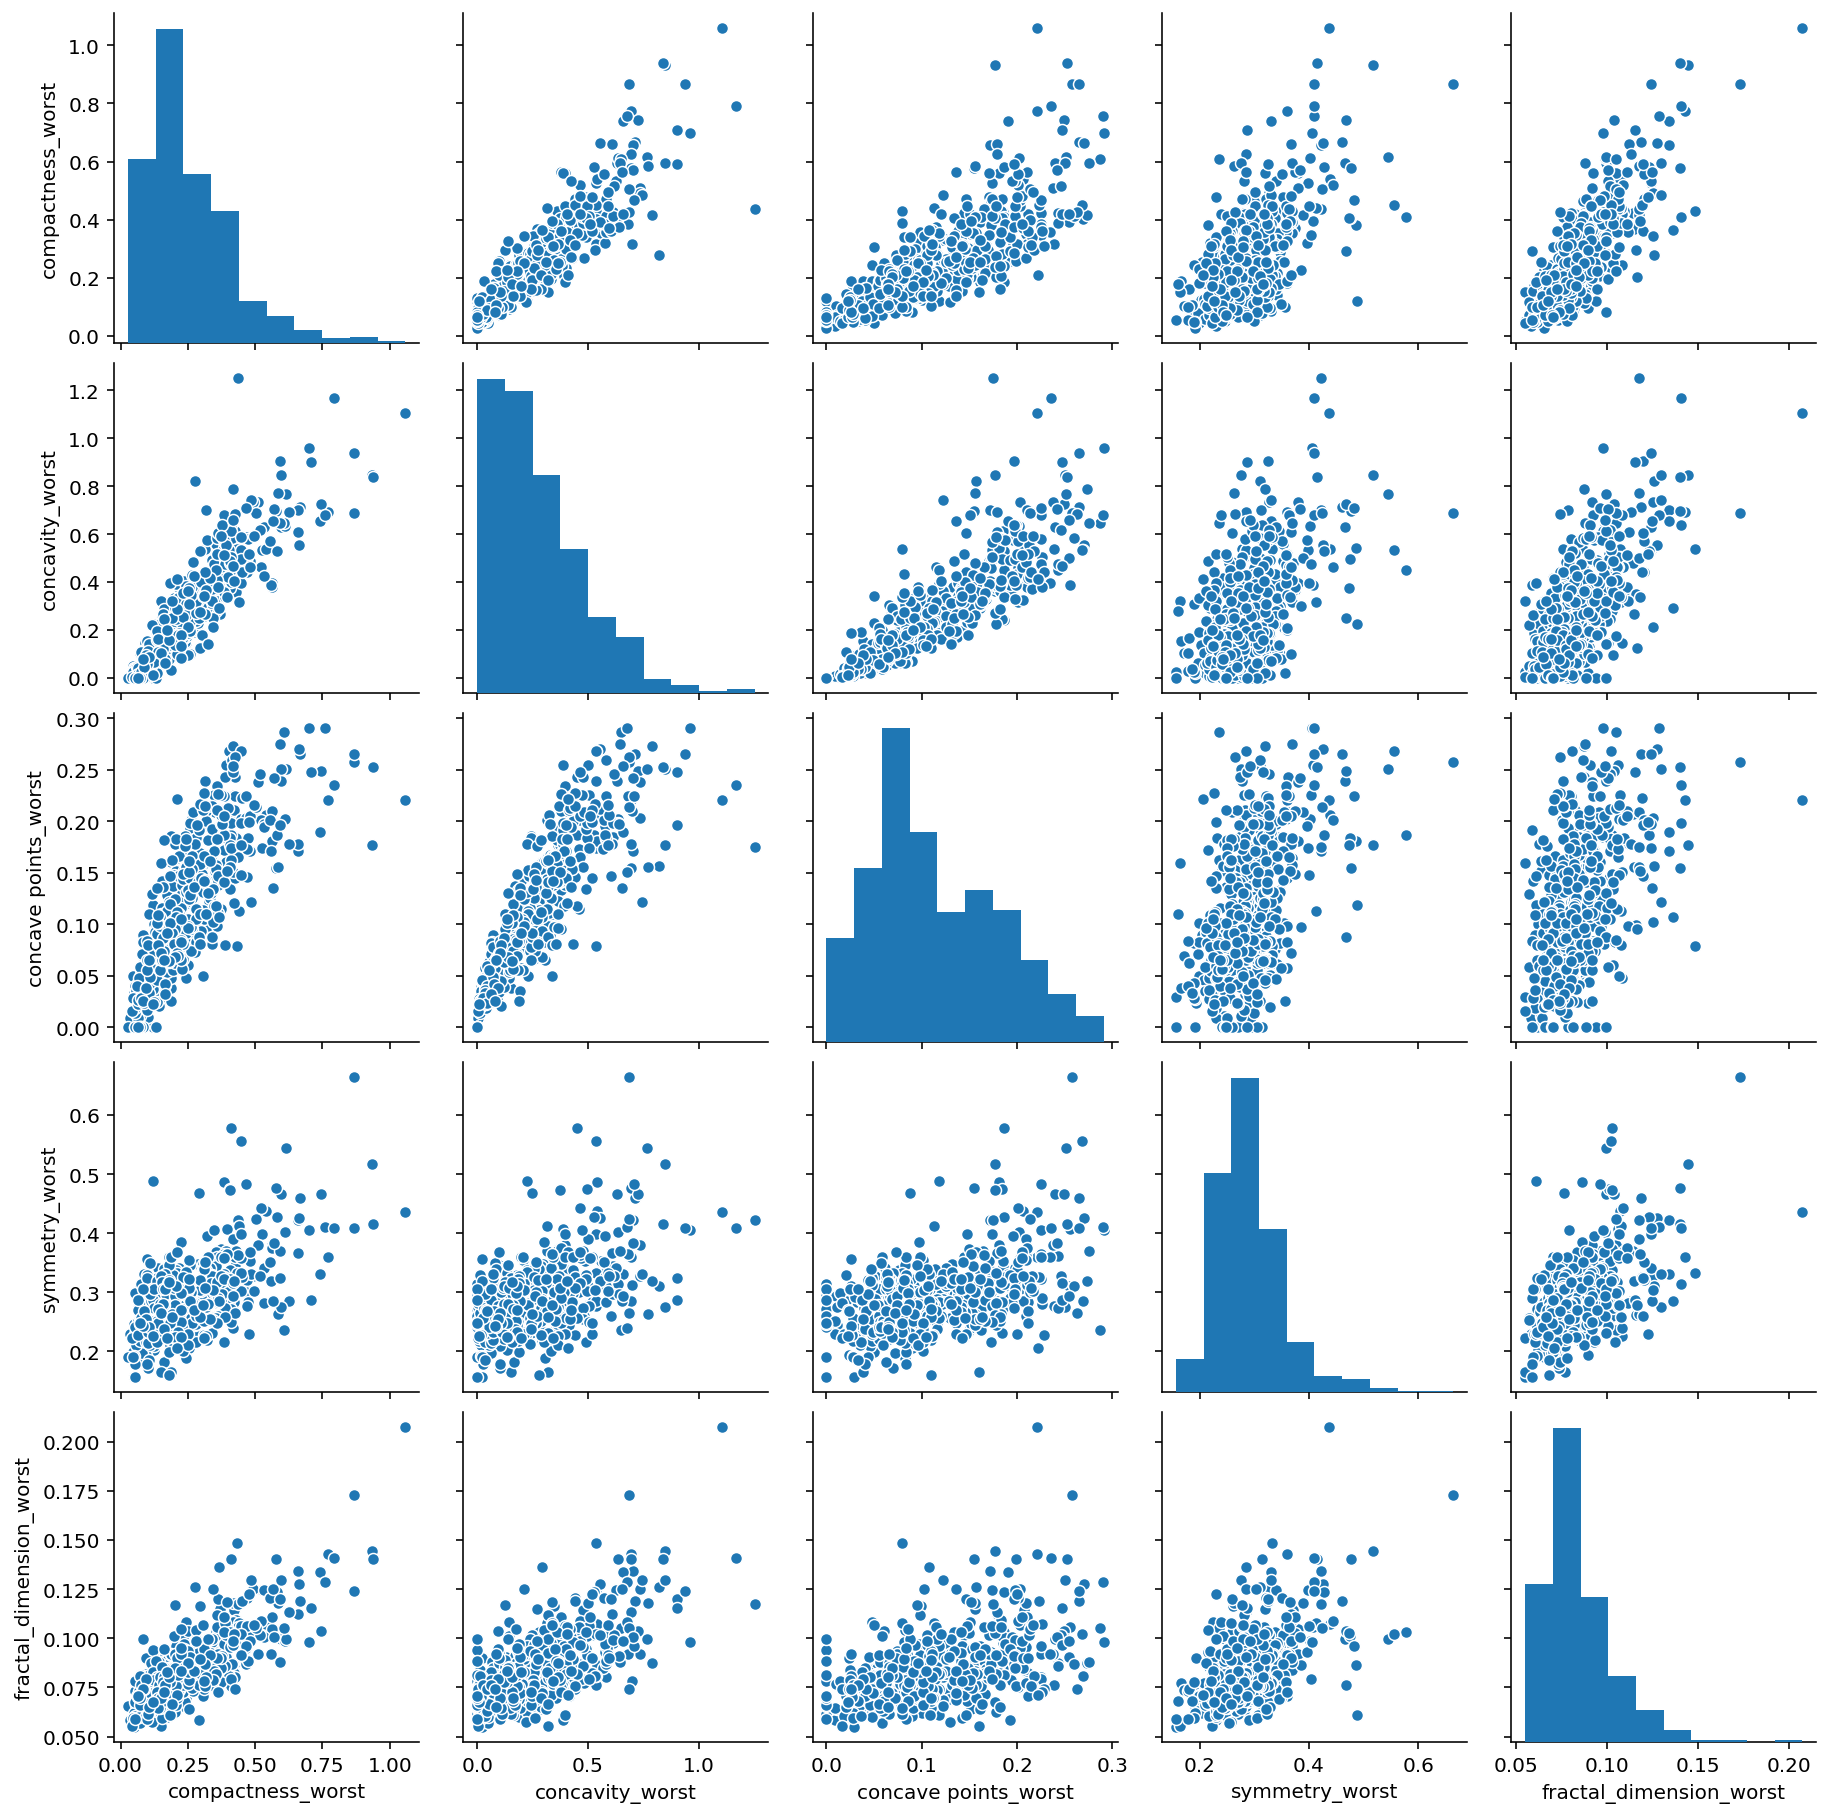

In [44]:
import seaborn as sns
sns.pairplot(df.iloc[:,25:30])

In [57]:
# Perform K-Means Clustering on the Dataset

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2)
kmeans.fit(df)
labels = kmeans.labels_

df['clusters']=labels
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,clusters
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## Check you work: 

This is something that in a truly unsupervised learning situation **WOULD NOT BE POSSIBLE**. But for educational purposes go back and grab the true diagnosis column (label) from the original dataset. Take your cluster labels and compare them to the original diagnosis column. You can make scatterplots for each to see how they compare or you can calculate a percent accuracy score like: 
\begin{align}
\frac{\text{Num Correct Labels}}{\text{Num Total Observations}}
\end{align}

In [58]:
# Compare check_values against -kmeans clusters

df.clusters
comparison_df = pd.concat([check_values,df.clusters],axis=1)
comparison_df.head()

,diagnosis,clusters
0,M,0
1,M,0
2,M,0
3,M,1
4,M,0


In [59]:
# Checking - and adding comparison 

diagnosis_int = pd.Series(check_values.replace(['M',"B"],[1,0]))
comparison_df = pd.concat([comparison_df,diagnosis_int],axis=1)
comparison_df.head()

,diagnosis,clusters,diagnosis
0,M,0,1
1,M,0,1
2,M,0,1
3,M,1,1
4,M,0,1


In [65]:
# Fix Column Name

comparison_df.columns = ['diagnosis','clusters','diagnosis_int']
comparison_df.head()

,diagnosis,clusters,diagnosis_int
0,M,0,1
1,M,0,1
2,M,0,1
3,M,1,1
4,M,0,1


In [66]:
correct=len(comparison_df[comparison_df['diagnosis_int']==comparison_df['clusters']])
total=len(df)
print(correct,',',total,',','Success Rate:',correct/total)

83 , 569 , Success Rate: 0.14586994727592267


In [ ]:
df.corr()

In [ ]:
df.cov()

# 2) Perform PCA on your dataset first and *then* use k-means clustering. 

- You need to **standardize** your data before PCA.
- First try **clustering** just on PC1 and PC2 so that you can make a scatterplot of your clustering.
- Then use use a scree plot to decide how many **principal components** to include in your clustering, and use however many principal components you need in order to retain **90%** of the variation of the original dataset.



In [67]:
from numpy import array
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

###Step 1: Reduce Dimensionality

In [68]:
# Turn data into array
np_data = array(pca)
#Standardize
scaler = StandardScaler()
norm_data = scaler.fit_transform(np_data)
# Create Test PCA Instance
pca = PCA(2)
#Fiting
pca.fit(norm_data)
#value and vectors
eigenvecs= pca.components_
eigenvals = pca.explained_variance_
#transform data:
pca_vals = pca.transform(norm_data)
pca_vals

array([[ 9.32458357,  2.15004105],
       [ 2.80075393, -3.87551183],
       [ 6.00963721, -1.0251781 ],
       ...,
       [ 1.16121013, -1.70080373],
       [10.48213445,  1.96271873],
       [-5.45445088, -0.89170135]])

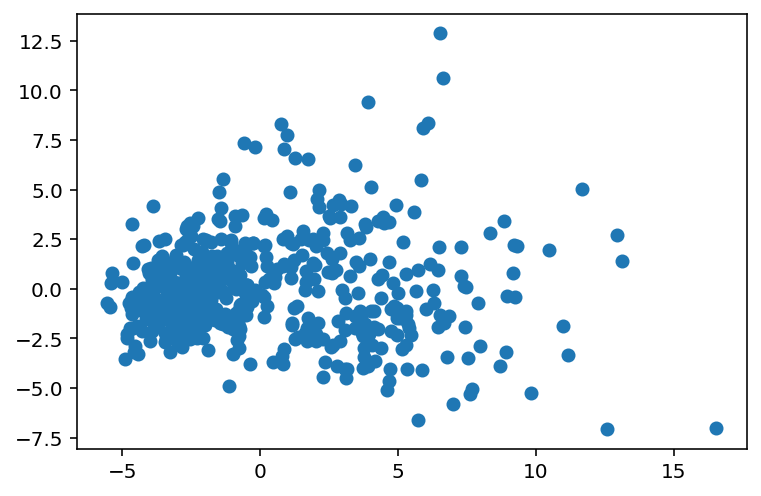

In [69]:
plt.scatter(pca_vals[:,0],pca_vals[:,1]);

###Step 2: Find the Clusters

>>"In this step, we will use k-means clustering to view the top three PCA components. In order to do this, we will first fit these principal components to the k-means algorithm and determine the best number of clusters. Measuring the sum of the squared distances to the nearest cluster center, aka inertia, will help us determine the ideal number of clusters for our k-means model. the k-means scree plot below indicates the percentage of variance explained, but in slightly different terms, as a function of the number of clusters."

https://medium.com/@dmitriy.kavyazin/principal-component-analysis-and-k-means-clustering-to-visualize-a-high-dimensional-dataset-577b2a7a5fe2



In [70]:
kmeans_pca1 = KMeans(n_clusters= 2)
kmeans_pca1.fit(pca_vals)
labels = kmeans.labels_
labels

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [71]:
check_vals = array(diagnosis_int)
sum(check_vals == labels)

83

###Step 3: Visualize and Interpret the Clusters

In [72]:
def scree_plot(pca):
    num_components=len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
    plt.figure(figsize=(18, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s" % ((str(vals[i]*100)[:3])), (ind[i], vals[i]), va="bottom", ha="center", fontsize=10)
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')

(569, 31)
[0.44597568 0.63481398 0.72577839 0.78969636 0.84302199 0.88196949
 0.90378241 0.9193525  0.9337333  0.94549651 0.95585931 0.96430234
 0.97239035 0.97921628 0.98411009]


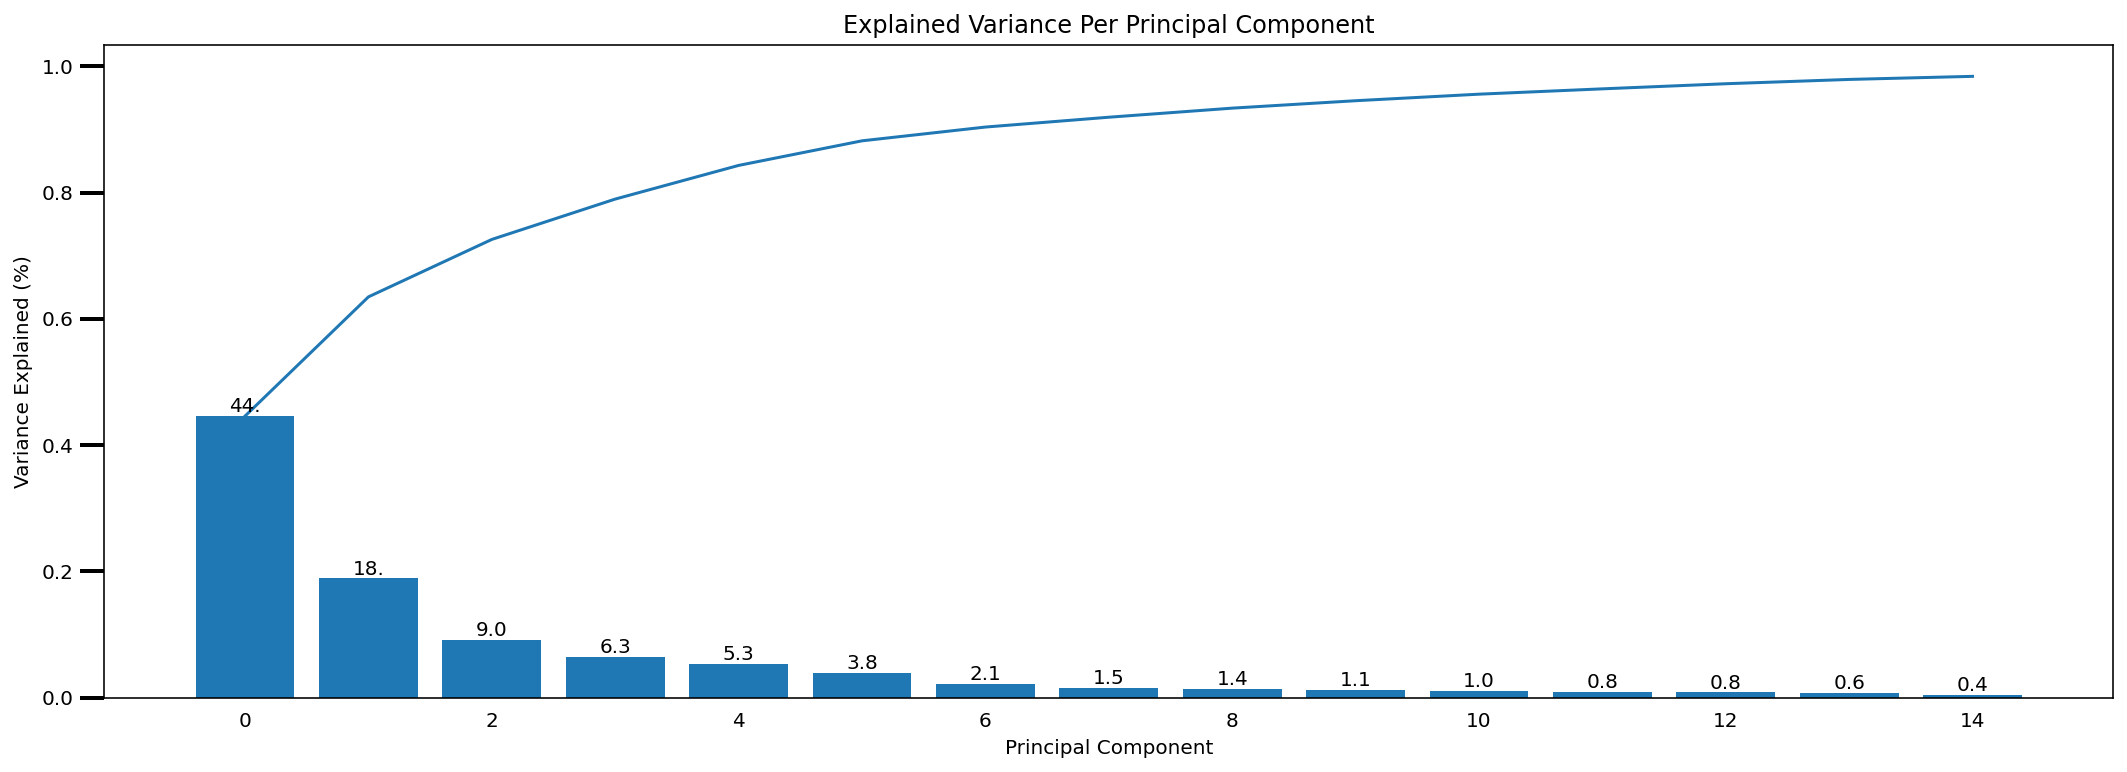

In [73]:
# pca instance
pca = PCA(15)
print(norm_data.shape)
# Fiting
pca.fit(norm_data)
vals = pca.explained_variance_ratio_
agg = np.cumsum(vals)
print(agg)
# Access value and vectors:
eigenvecs= pca.components_
eigenvals = pca.explained_variance_
scree_plot(pca)
# Above 90% on the 7th pca component

In [74]:
pca = PCA(7)
pca.fit(norm_data)
pca7_vals = pca.transform(norm_data)
pca7_vals

array([[ 9.32458357,  2.15004105, -1.11210791, ..., -1.18236741,
         1.41215403,  2.15187177],
       [ 2.80075393, -3.87551183, -0.52804296, ...,  0.59769669,
         0.02552167, -0.04701733],
       [ 6.00963721, -1.0251781 , -0.54944642, ..., -0.1877008 ,
         0.5402225 , -0.68665709],
       ...,
       [ 1.16121013, -1.70080373,  0.51650717, ...,  1.86701692,
        -0.53095555, -0.13566001],
       [10.48213445,  1.96271873, -1.88501759, ..., -0.04758459,
         0.56753406,  0.21789878],
       [-5.45445088, -0.89170135,  1.50284085, ..., -0.22039624,
         1.61599093,  1.67033294]])

In [75]:
kmeans_pca2 = KMeans(n_clusters= 2)
kmeans_pca2.fit(pca7_vals)
labels = kmeans_pca2.labels_
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [76]:
check_vals = array(diagnosis_int)
wrong =sum(check_vals==labels)
wrong

44

## Check your work: 

- Compare your PC1, PC2 clustering scatterplot to the clustering scatterplots you made on the raw data
- Calculate accuracy scores for both the PC1,PC2 Principal component clustering and the 90% of explained variance clustering.

How do your accuracy scores -when preprocessing the data with PCA- compare to the accuracy when simply clustering on the raw data?

In [ ]:
#PCA1

plt.scatter(pca_vals[:,0],pca_vals[:,1]);

In [ ]:
#PCA2 - (more density)

plt.scatter(pca7_vals[:,0:3],pca7_vals[:,4:7]);

In [ ]:
correct=len(df)-wrong
total=len(df)
print('Total correct = ',correct)
print("% correct = ",correct/total)

Based off the data, thesuccess grew from 85.4% to the second more accurate PCA at 92.2%. Its about 6.6% more beneficial success rate to saves lives.

# Stretch Goals:

- Study for the Sprint Challenge
- Work on your Data Storytelling Project